# **Final Project 4 : Clustering**

Proyek ini dibuat untuk meemnuhi tugas dari Course Python for Data Science 

### **Anggota** ###

- Muhammad Reza Pahlevi
- Caesariansyah Dwi Fadhilah

## **A. Introduction** 

Dalam ranah pemasaran strategis, kasus ini memerlukan pengembangan strategi segmentasi pelanggan yang komprehensif. Upaya ini berkisar pada kumpulan data sampel yang merangkum perilaku penggunaan sekitar 9000 pemegang kartu kredit aktif selama enam bulan terakhir. Dataset yang disusun pada tingkat nasabah ini terdiri dari 18 variabel perilaku, yang masing-masing menjelaskan berbagai aspek dari interaksi keuangan pemegang kartu kredit. Mosaik data ini menyediakan lahan subur untuk perumusan pendekatan pemasaran yang ditargetkan, yang bertujuan untuk meningkatkan kepuasan nasabah dan mengoptimalkan upaya promosi. Dengan 8950 contoh yang merinci seluk-beluk profil kartu kredit nasabah, tugas yang harus dilakukan adalah menyaring wawasan yang dapat ditindaklanjuti untuk memandu strategi pemasaran yang efektif.

Untuk memfasilitasi penyelidikan ini, dataset yang bersumber dari Kaggle digunakan, yang berisi informasi yang diekstrak dari dataset kartu kredit untuk pengelompokan. Dataset ini terdiri dari 8950 baris dan 18 kolom.

## **B. Import Libraries**

Libraries diperlukan untuk mengelompokkan cluster-cluster dengan memiliki kemiripan yang sama.

In [185]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.neighbors import NearestNeighbors
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.ensemble import ExtraTreesClassifier

import warnings
warnings.filterwarnings("ignore")

## **C. Data Loading**

### **Import Dataset**

Impor *CC GENERAL.csv* as *df*. And the required of dataset will be read by the program.

In [99]:
df = pd.read_csv("CC GENERAL.csv")
pd.set_option('display.max_columns', 50)
df.head(5)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

## **D. Data Cleaning**

Menampilkan ringkasan dari DataFrame

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [101]:
for col in df.columns:
    print(col, ":", df[col].nunique())

CUST_ID : 8950
BALANCE : 8871
BALANCE_FREQUENCY : 43
PURCHASES : 6203
ONEOFF_PURCHASES : 4014
INSTALLMENTS_PURCHASES : 4452
CASH_ADVANCE : 4323
PURCHASES_FREQUENCY : 47
ONEOFF_PURCHASES_FREQUENCY : 47
PURCHASES_INSTALLMENTS_FREQUENCY : 47
CASH_ADVANCE_FREQUENCY : 54
CASH_ADVANCE_TRX : 65
PURCHASES_TRX : 173
CREDIT_LIMIT : 205
PAYMENTS : 8711
MINIMUM_PAYMENTS : 8636
PRC_FULL_PAYMENT : 47
TENURE : 7


### **Check Duplicate Data**

In [102]:
df.duplicated().sum()

0

Dari kode tersebut, maka dapat disimpulkan tidak terdapat data yang terduplikasi.

In [103]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Dari kode tersebut dapat disimpulkan bahwa pada variable MINIMUM_PAYMENTS memiliki 313 null value dan CREDIT_LIMIT memiliki null value sebanyak 1

In [104]:
dfnull = df.columns[df.isnull().any()].tolist()
imputer = KNNImputer()
dfImputer = pd.DataFrame(imputer.fit_transform(df[dfnull]), columns=dfnull)
df=df.fillna(dfImputer)
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

setelah diisi dengan KNNImputer, null value menjadi 0.

<span style="color:red">KNNImputer adalah metode imputasi yang menggunakan KNN untuk mengisi null values, bekerja dengan mencari **k-Nearest Neighbors** dari setiap sampel yang memiliki nilai yang hilang, dan kemudian menghitung nilai imputasi berdasarkan value nearest neighbors</span>

In [105]:
df = df.drop('CUST_ID', axis=1)

Menghilangkan kolom CUST_ID karena tidak dibutuhkan pada clustering.

In [106]:
for feature in df.columns:
    fig = px.box(df, y=feature, title=f'Boxplot of {feature}')
    fig.update_layout(height=500, width=500)
    fig.show()

<span style="color:RED">**Outliers merupakan nilai-nilai yang jauh berbeda dari sebagian besar data dalam suatu himpunan. Nilai ini bisa memiliki perbandingan yang jauh diatas ataupun dibawah dari nilai lainnya.**</span>

<span style="color:RED">Apabila ingin menghilangkan outliers maka harus mempertimbangkan beberapa hal, contohnya apakah outliers tersebut merupakan suatu anomali atau error dari sebuah data. selain itu juga menentukan apakah outliers akan berpengaruh pada model yang akan digunakan, hal ini dikarenakan beberpa model seperti k-means yang sensitif terhadap outliers.</span>

Pada visualisasi diatas dapat dilihat bahwa data memiliki sangat banyak outliers. Dimana outliers tersebut bukanlah error ataupun anomali, melainkan persebaran data dikarenakan data merupakan kebiasaan dari 9000 user pemegang kartu kredit. Perbedaan value data dapat dipengaruhi oleh beberapa faktor eksternal seperti jumlah pendapatan, gaya hidup ataupun berbagai hal lainnya. Maka dari itu untuk sementara maka outliers tidak akan di hilangkan. 

## **E. Exploratory Data Analysis**

In [107]:
df.describe().T

count         mean          std        min  \
BALANCE                           8950.0  1564.474828  2081.531879   0.000000   
BALANCE_FREQUENCY                 8950.0     0.877271     0.236904   0.000000   
PURCHASES                         8950.0  1003.204834  2136.634782   0.000000   
ONEOFF_PURCHASES                  8950.0   592.437371  1659.887917   0.000000   
INSTALLMENTS_PURCHASES            8950.0   411.067645   904.338115   0.000000   
CASH_ADVANCE                      8950.0   978.871112  2097.163877   0.000000   
PURCHASES_FREQUENCY               8950.0     0.490351     0.401371   0.000000   
ONEOFF_PURCHASES_FREQUENCY        8950.0     0.202458     0.298336   0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  8950.0     0.364437     0.397448   0.000000   
CASH_ADVANCE_FREQUENCY            8950.0     0.135144     0.200121   0.000000   
CASH_ADVANCE_TRX                  8950.0     3.248827     6.824647   0.000000   
PURCHASES_TRX                     8950.0    14.709832    24.857649   0.000000   
CREDIT_LIMIT                      8950.0  4494.293646  3638.642266  50.000000   
PAYMENTS                          8950.0  1733.143852  2895.063757   0.000000   
MINIMUM_PAYMENTS                  8950.0   868.716633  2339.363807   0.019163   
PRC_FULL_PAYMENT                  8950.0     0.153715     0.292499   0.000000   
TENURE                            8950.0    11.517318     1.338331   6.000000   

                                          25%          50%          75%  \
BALANCE                            128.281915   873.385231  2054.140036   
BALANCE_FREQUENCY                    0.888889     1.000000     1.000000   
PURCHASES                           39.635000   361.280000  1110.130000   
ONEOFF_PURCHASES                     0.000000    38.000000   577.405000   
INSTALLMENTS_PURCHASES               0.000000    89.000000   468.637500   
CASH_ADVANCE                         0.000000     0.000000  1113.821139   
PURCHASES_FREQUENCY                  0.083333     0.500000     0.916667   
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.083333     0.300000   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.166667     0.750000   
CASH_ADVANCE_FREQUENCY               0.000000     0.000000     0.222222   
CASH_ADVANCE_TRX                     0.000000     0.000000     4.000000   
PURCHASES_TRX                        1.000000     7.000000    17.000000   
CREDIT_LIMIT                      1600.000000  3000.000000  6500.000000   
PAYMENTS                           383.276166   856.901546  1901.134317   
MINIMUM_PAYMENTS                   170.712120   325.133834   850.024457   
PRC_FULL_PAYMENT                     0.000000     0.000000     0.142857   
TENURE                              12.000000    12.000000    12.000000   

                                          max  
BALANCE                           19043.13856  
BALANCE_FREQUENCY                     1.00000  
PURCHASES                         49039.57000  
ONEOFF_PURCHASES                  40761.25000  
INSTALLMENTS_PURCHASES            22500.00000  
CASH_ADVANCE                      47137.21176  
PURCHASES_FREQUENCY                   1.00000  
ONEOFF_PURCHASES_FREQUENCY            1.00000  
PURCHASES_INSTALLMENTS_FREQUENCY      1.00000  
CASH_ADVANCE_FREQUENCY                1.50000  
CASH_ADVANCE_TRX                    123.00000  
PURCHASES_TRX                       358.00000  
CREDIT_LIMIT                      30000.00000  
PAYMENTS                          50721.48336  
MINIMUM_PAYMENTS                  76406.20752  
PRC_FULL_PAYMENT                      1.00000  
TENURE                               12.00000

Dari hasil statistik diatas dapat disimpulkan bahwa :
1. Data rata rata positif skewed.
1. Balance atau saldo yang tersisa dari 8950 user memiliki rata-rata `1564.47`, dan dengan Q2 menunjukkan nilai `873.385231`, dapat disimpulkan bahwa setengah dari pengguna memiliki saldo kurang dari nilai Q2.
2. Pada BALANCE_FREQUENCY menunjukkan bahwa sebagian besar pengguna adalah pengguna aktif yang sering menggunakan kartu kredit dan hanya sebagian kecil yang jarang menggunakan kartu kredit dilihat dari proporsi Q2 yang langsung menunjukkan value `1`.
3. Beberapa pengguna sama sekali tidak melakukan pembelian dengan kartu kredit karena value minimum adalah `0`. Dengan persebaran data pada Q1, Q2 dan Q3 menunjukkan bahwa dari 8950 pengguna, melakukan pembelian dengan nilai yang beragam.
4. Pada ONEOFF_PURCHASES menunjukkan bahwa rata-ratanya adalah `592.44` dan dengan value mulai pada Q3 dan seterusnya memiliki nilai yang lebih tinggi dari INSTALLMENTS_PURCHASES, dapat disimpulkan secara kasar bahwa beberapa pengguna ketika membeli sesuatu dengan harga yang tinggi lebih menyukai menggunakan ONEOFF_PURCHASES daripada mencicil.
5. Rata-rata TENURE adalah `11.517318` yang menunjukkan bahwa hampir semua memiliki TENURE `12` bulan.

##### **Correlation**

In [108]:
fig = px.imshow(df.corr(),title="Correlation Every Feature in Dataset")
fig.update_layout(width=900, height=700)
fig.show()

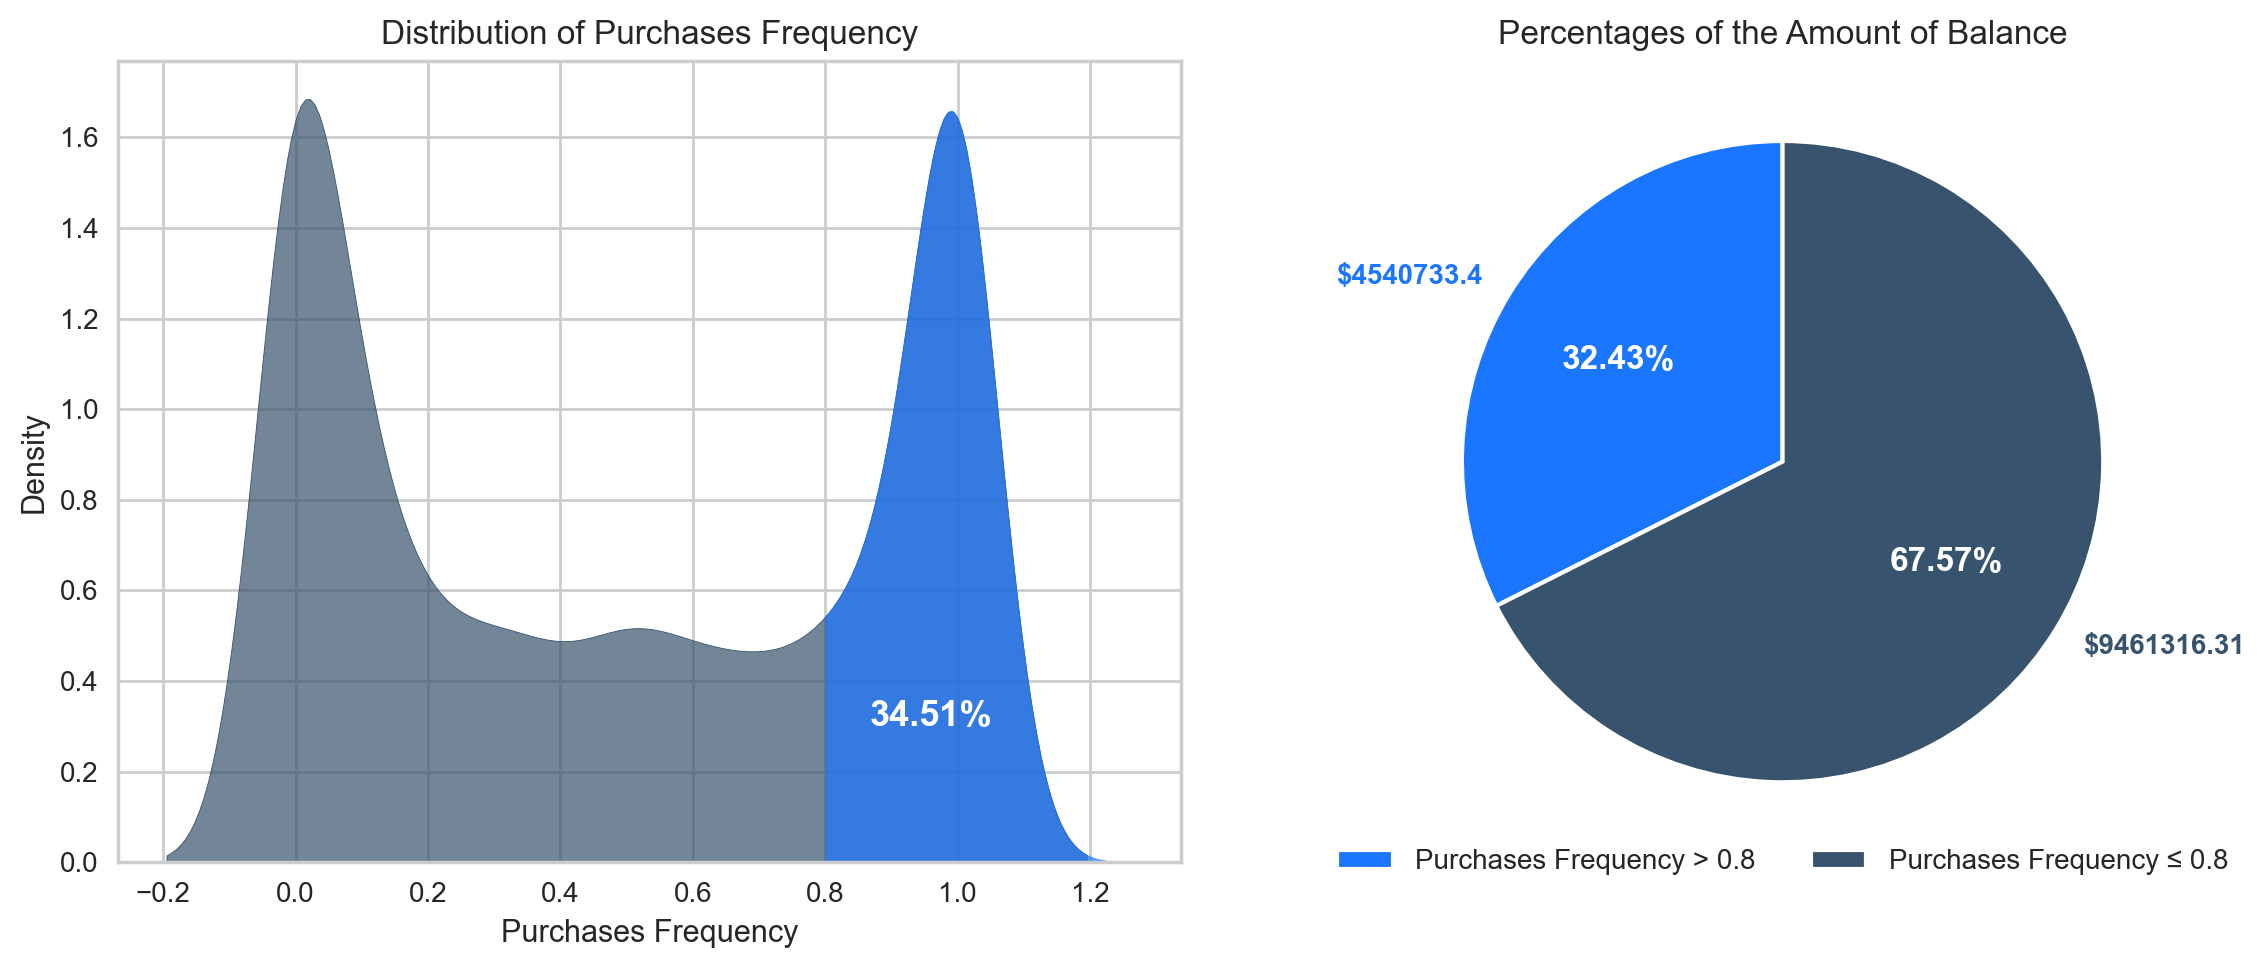

In [111]:
fig,ax = plt.subplots(1,2,figsize=(12,5),dpi=200)

kde_plot = sns.kdeplot(ax=ax[0],data=df,x="PURCHASES_FREQUENCY",color="#37536d",fill=True,alpha=0.7)
xmin,xmax = kde_plot.get_xlim()
kde = gaussian_kde(df["PURCHASES_FREQUENCY"])
x = np.linspace(xmin,xmax,10_000)
kde_y = kde(x)
x0,y0 = [],[]
for i,j in zip(x,kde_y):
    if i > 0.8:
        x0.append(i)
        y0.append(j)
x0,y0 = np.array(x0),np.array(y0)
area0 = round(simps(y0,x0,dx=1) * 100,0)
kde_plot.fill_between(x=x0,y1=y0,color="#1a76ff",alpha=0.7)
ax[0].text(
    x=0.96,
    y=0.3,
    horizontalalignment="center",
    s=f"{round(len(df[df['PURCHASES_FREQUENCY'] > 0.8]) / len(df) * 100,2)}%",
    color="white",
    fontweight="bold",
    fontsize=13
)
ax[0].set_title("Distribution of Purchases Frequency")
ax[0].set_xlabel("Purchases Frequency")

patches,texts,pcts = ax[1].pie(
    [df[df["PURCHASES_FREQUENCY"] > 0.8]["BALANCE"].sum(),df[df["PURCHASES_FREQUENCY"] <= 0.8]["BALANCE"].sum()],
    labels=[f'${round(df[df["PURCHASES_FREQUENCY"] > 0.8]["BALANCE"].sum(),2)}',f'${round(df[df["PURCHASES_FREQUENCY"] <= 0.8]["BALANCE"].sum(),2)}'],
    startangle=90,
    colors=["#1a76ff","#37536d"],
    autopct="%.2f%%",
    wedgeprops={"linewidth":1.5,"edgecolor":"white"}
)
ax[1].set_title("Percentages of the Amount of Balance")
ax[1].legend(patches,["Purchases Frequency > 0.8","Purchases Frequency ≤ 0.8"],ncol=2,bbox_to_anchor=(0.5,0),loc="center")
for index,patch in enumerate(patches):
    texts[index].set_color(patch.get_facecolor())
plt.setp(pcts,color="white",fontweight="bold")
plt.setp(texts,fontweight="bold")

plt.tight_layout()
plt.show()

Total saldo pelanggan yang paling sering berbelanja (mari kita tetapkan ambang batas pada 0,8) mencapai 32,43% dari total saldo semua pelanggan.

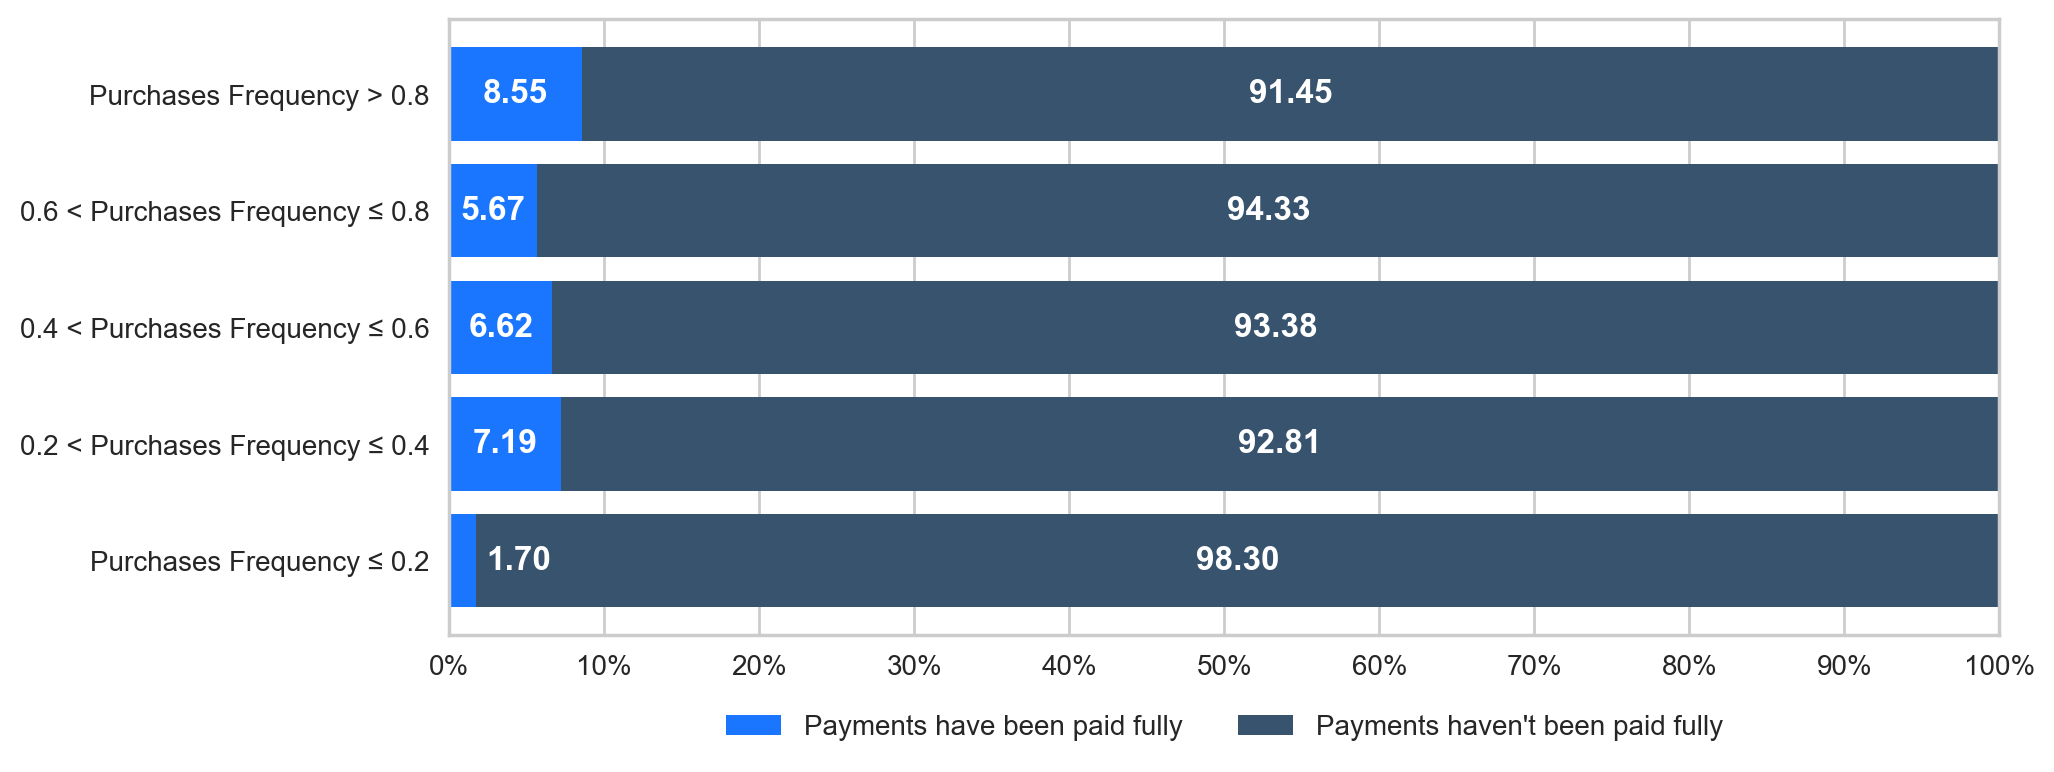

In [112]:
first = df[df["PURCHASES_FREQUENCY"] <= 0.2]
second = df[(df["PURCHASES_FREQUENCY"] > 0.2) & (df["PURCHASES_FREQUENCY"] <= 0.4)]
third = df[(df["PURCHASES_FREQUENCY"] > 0.4) & (df["PURCHASES_FREQUENCY"] <= 0.6)]
fourth = df[(df["PURCHASES_FREQUENCY"] > 0.6) & (df["PURCHASES_FREQUENCY"] <= 0.8)]
fifth = df[df["PURCHASES_FREQUENCY"] > 0.8]
labels = [
    "Purchases Frequency ≤ 0.2","0.2 < Purchases Frequency ≤ 0.4","0.4 < Purchases Frequency ≤ 0.6",
    "0.6 < Purchases Frequency ≤ 0.8","Purchases Frequency > 0.8"
]

prc_full_payment_is_1,prc_full_payment_not_1 = [],[]
for subset in [first,second,third,fourth,fifth]:
    prc_full_payment_is_1.append(len(subset[subset["PRC_FULL_PAYMENT"] == 1]) / len(subset) * 100)
    prc_full_payment_not_1.append(len(subset[subset["PRC_FULL_PAYMENT"] != 1]) / len(subset) * 100)

fig,ax = plt.subplots(figsize=(10,4),dpi=200)
n = 0

for label,prc_is_1,prc_not_1 in zip(labels,prc_full_payment_is_1,prc_full_payment_not_1):
    if n == 0:
        ax.barh(label,prc_is_1,color="#1a76ff",label="Payments have been paid fully")
        ax.barh(label,prc_not_1,left=prc_is_1,color="#37536d",label="Payments haven't been paid fully")
        n += 1
    else:
        ax.barh(label,prc_is_1,color="#1a76ff")
        ax.barh(label,prc_not_1,left=prc_is_1,color="#37536d")
for container in ax.containers[:1]:
    ax.bar_label(container,fmt="%.2f",padding=4,color="white",fontweight="bold")
for container in ax.containers[1:]:
    ax.bar_label(container,fmt="%.2f",label_type="center",color="white",fontweight="bold")

ax.set_xlim(xmax=100)
ax.set_xticks(np.arange(0,101,10),[f"{xtick}%" for xtick in np.arange(0,101,10)])
ax.legend(ncol=2,bbox_to_anchor=(0.5,-0.15),loc="center")

plt.show()

Dari barplot di atas, dapat kita lihat bahwa tidak peduli seberapa sering pelanggan melakukan pembelian, hanya ada kurang dari 10% yang telah membayar lunas di setiap kelompok.

### **PURCHASES and PURCHASES_TRX VS TENURE**

**Kenapa diambil fitur `PURCHASES` dan `PURCHASES_TRX` kemudian dibandingkan dengan `TENURE`?**

**PURCHASES** sendiri merupakan jumlah pembelian yang dilakukan oleh user pada dataset, sedangkan **PURCHASES_TRX** merupakan jumlah pembelian yang telah dilakukan oleh user. Dengan membandingkan kedua fitur tersebut dapat melihat kebiasaan dari user dalam menggunakan kartu kredit yang didasarkan pada harga hal yang dibeli.

In [113]:
pur_Temean = df.groupby('TENURE')['PURCHASES'].mean().reset_index()
purTx_Temean = df.groupby('TENURE')['PURCHASES_TRX'].mean().reset_index()
fig = go.Figure()
fig.add_trace(go.Bar(x=pur_Temean['TENURE'], y=pur_Temean['PURCHASES'], name='PURCHASES', marker_color='rgb(139,240,222)'))
fig.add_trace(go.Bar(x=purTx_Temean['TENURE'], y=purTx_Temean['PURCHASES_TRX'], name='PURCHASES_TRX', marker_color='rgb(158,191,255)'))
fig.update_layout(
    title='PURCHASES and PURCHASES_TRX VS TENURE (mean)',
    xaxis=dict(tickfont_size=12,
               title='TENURE'),
    yaxis=dict(
        title='PURCHASES and PURCHASES_TRX',
        titlefont_size=14,
        tickfont_size=12,
    ),
    barmode='group',
    bargap=0.25,
    bargroupgap=0.0 
)
fig.show()

Dapat disimpulkan bahwa user memiliki kecenderungan untuk mengambil tenur 12 bulan apabila harga suatu barang cukup tinggi juga dengan jumlah yang banyak. Sedangkan dengan harga suatu barang yang rendah cenderung memilih untuk memiliki tenur yang rendah.

### **Test**

In [114]:
fig = px.scatter(df, x='ONEOFF_PURCHASES', y='INSTALLMENTS_PURCHASES',
                 title='ONE OFF PURCHASES vs INSTALLMENTS PURCHASES',
                 labels={'ONEOFF_PURCHASES': 'ONEOFFPURCHASES', 'INSTALLMENTS_PURCHASES': 'INSTALLMENTSPURCHASES'},
                 color_discrete_sequence=['red'])

fig.update_traces(marker=dict(color='yellow', line=dict(color='red', width=1)))
fig.update_layout(height=500, width=700)
fig.show()


Dari Scatter plots diatas dapat disimpulkan bahwa kebqanyakan user lebih memilih INSTALLMENTS_PURCHASES daripada ONEOFF_PURCHASES

## **F. Data Preprocessing**

### **Data Scaling**

In [139]:
scaler = StandardScaler() 
scaledHPK = pd.DataFrame(scaler.fit_transform(df)) #scaler untuk hopkins statistic
scaled = scaler.fit_transform(df) #scaler untuk yang normal

**Kenapa dibedakan?**<br>
Karena memudahkan daripada harus mengubah data menjadi array lagi setelah hopkins statistic

### **Hopkins statistic**

Hopkins Statistic atau Hopkins Test adalah suatu metode statistik yang digunakan untuk mengukur kecenderungan suatu dataset untuk bersifat clustering. Saya memutuskan untuk menggunakan Hopkins Statistic karena ingin tau adakah cara untuk menentukan apakah data memiliki hubungan aku kecenderungan unuk di kelompokan, yang artinya bisa di lakukan clustering atau tidak.

Refrensi dimana saya menemukan Hopkins Statistic :<br>
[Web yang membahas kecenderungan data untung mengkelompok](https://www.datanovia.com/en/lessons/assessing-clustering-tendency/)<br>
[Wikipedia Hopkins statistic](https://en.wikipedia.org/wiki/Hopkins_statistic)<br>
[Sumber kode Hopkins Statistic](https://datascience.stackexchange.com/questions/14142/cluster-tendency-using-hopkins-statistic-implementation-in-python)


In [140]:
#Fungsi Hopkins Statistic
def hpk(X):
    d = X.shape[1] # columns
    n = len(X) # rows
    m = int(0.1 * n) # heuristic from article [1]

    from sklearn.neighbors import NearestNeighbors
    nbrs = NearestNeighbors(n_neighbors=1, algorithm='brute').fit(X)

    from random import sample
    rand_X = sample(range(0, n, 1), m) #buat sampel acak dari m, antara 0 sampe n-1

    from numpy.random import uniform
    ujd = []
    wjd = []
    for j in range(0, m): #range 0-m
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True) #kode asli pake distribusi normal, diganti ke uniform biar ga tergantung mean, apalagi datanya skew parah
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True) #pakai iloc biar kalo ada float ga kacau
        wjd.append(w_dist[0][1])

    H = sum(ujd) / (sum(ujd) + sum(wjd))
    return H

Fungsi untuk Hopkins Statictic

In [117]:
hpktest = hpk(scaledHPK)
print( ">>", hpktest)

>> 0.9671942829609542


Dari hasil Hopkins Statistic menujukan angka `0.9671942829609542` yang berari data memiliki kecenderungan untk dikelompokan hal ini didasarkan dari didapatkan kode awal yang mengatakan bahwa :

**`If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.`**

Jadi data tersebut memiliki kecenderungan yang kuat untuk berkelompok atau dikelompokan

### **Hierarchical Clustering**

#### **Principal Component Analysis**

In [118]:
pca =PCA(n_components=2, random_state=42)
scaled = pca.fit_transform(scaled)

## **G. Model Definition**

### **K-Means**

#### **Elbow Method**

In [141]:
km_model = [KMeans(n_clusters=km, random_state=42).fit(scaled) for km in range(1,11)]
wcss = [mod.inertia_ for mod in km_model ]

figelkm = px.line(x=range(1, 11), 
              y=wcss, markers=True, 
              title='Elbow Method')
figelkm.update_layout(xaxis_title='Number of Clusters', 
                  yaxis_title='km_iner')
figelkm.show()

Dari test elbow score dapat disimpulkan bahwa 2,3 dan 4 memiliki nilai yang paling baik.

#### **Silhouette Score**

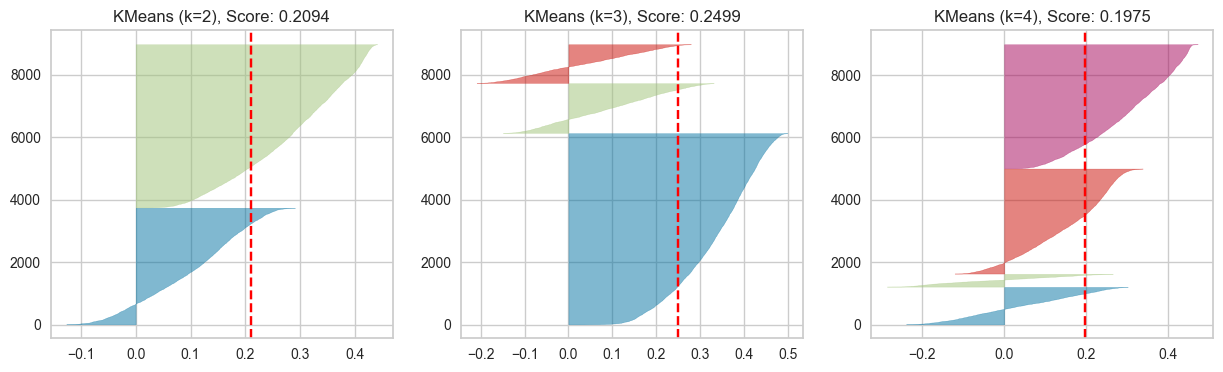

In [142]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

km_shsc = [silhouette_score(scaled, mod.labels_)for mod in km_model[1:4]]
for i, mod in enumerate(km_model[1:4], 1):
    visualizer = SilhouetteVisualizer(mod, colors='yellowbrick', ax=ax[i-1])
    visualizer.fit(scaled)
    
    shkm_score = silhouette_score(scaled, mod.labels_)

    ax[i-1].set_title(f'KMeans (k={i+1}), Score: {shkm_score:.4f}')

plt.show()


- Semua cluster berada diatas rata-rata menandakan semua cluster well-defined dan terbagi dengan baik.
- dengan pertimbangan persebaran semu cluster yang memiliki score diatas rata-rata maka akan diambil `K=4`
- penggambilan`K=4` ini karena perbedaan score yang tidak terlalu jauh juga jumlah cluster yang lebih banyak.

[Refrensi silhouette scores dan Elbow Method](https://vitalflux.com/kmeans-silhouette-score-explained-with-python-example/)

In [143]:
kmDef4 = KMeans(n_clusters=4, random_state=42)

### **DBSCAN**

In [144]:
neighbors=NearestNeighbors(n_neighbors=2)
nbrs=neighbors.fit(scaled)
distances, indices=nbrs.kneighbors(scaled)
distances=np.sort(distances, axis = 0)

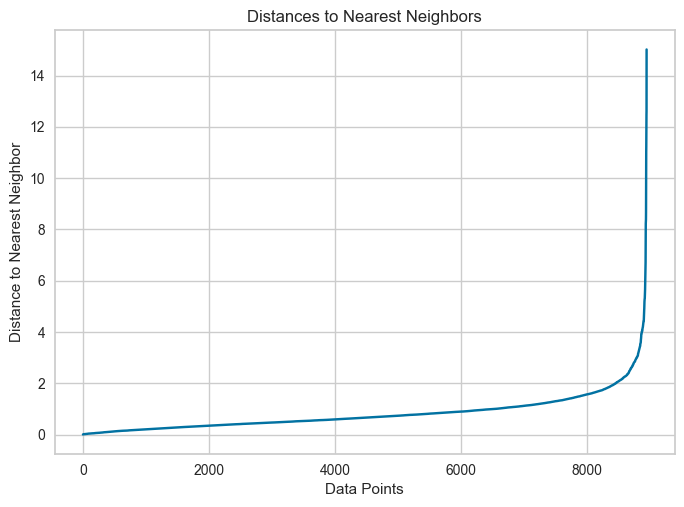

In [145]:
plt.plot(distances[:, 1])
plt.title('Distances to Nearest Neighbors')
plt.xlabel('Data Points')
plt.ylabel('Distance to Nearest Neighbor')
plt.show()

Dari Visualisasi diatas menunjukkan bahwa maximum curvatur berada di X lebih dari 8000 dan y sekitar 2, sehingga akan memilih 2 sebagai epsilon

In [146]:
db_model = DBSCAN(eps=2, min_samples=5)

### **Hierarchical Clustering**

In [147]:
linkage_matrix = linkage(scaled, method='ward', metric='euclidean')

## **H. Model Training**

### **K-Means**

In [148]:
y_km = kmDef4.fit(scaled)

#### **Training K-Means**

In [149]:
dfKMfin = df.copy()
dfKMfin['Cluster_KM'] = y_km.labels_

Copy df agar data asli tidak terganggu.

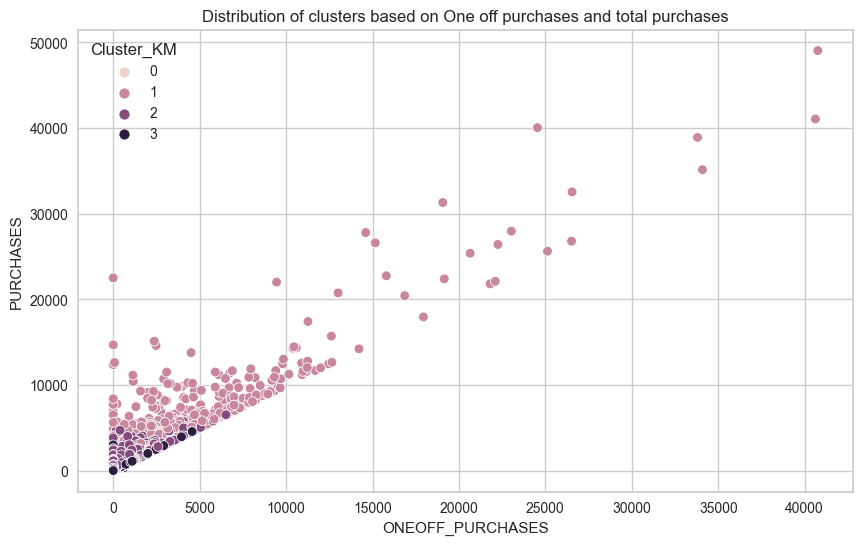

In [150]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=dfKMfin, x='ONEOFF_PURCHASES', y='PURCHASES', hue='Cluster_KM')
plt.title('Distribution of clusters based on One off purchases and total purchases')
plt.show()

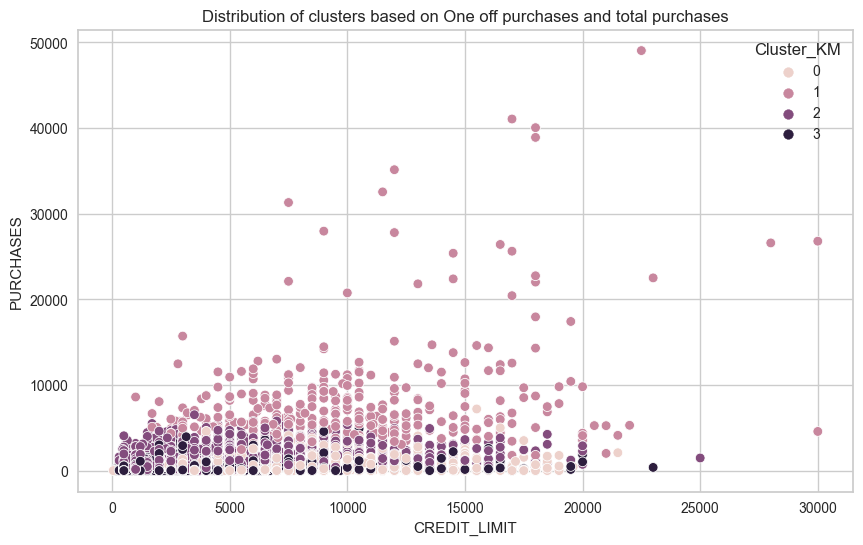

In [151]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=dfKMfin, x='CREDIT_LIMIT', y='PURCHASES', hue='Cluster_KM')
plt.title('Distribution of clusters based on One off purchases and total purchases')
plt.show()

### **DBSCAN**

In [152]:
dfDBfin = df.copy()
dfDBfin['Cluster_DB'] = db_model.fit_predict(scaled)

Copy df agar data asli tidak terganggu.

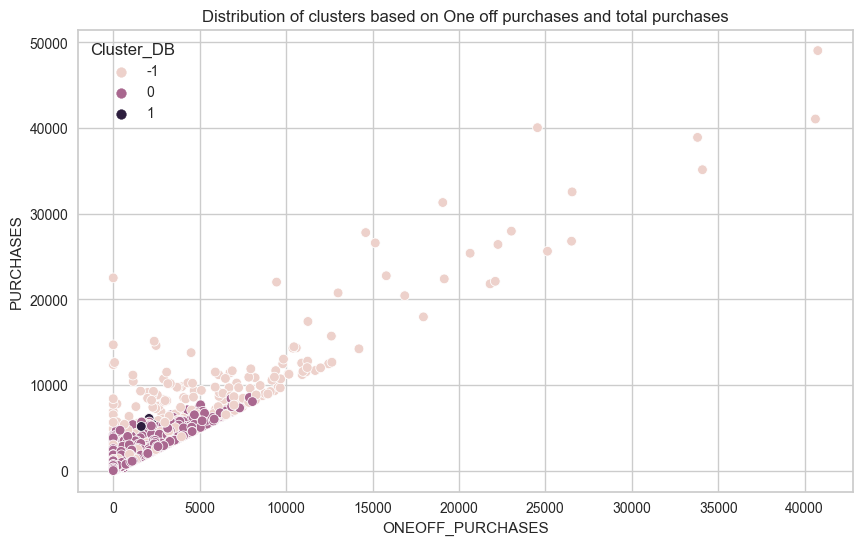

In [153]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=dfDBfin, x='ONEOFF_PURCHASES', y='PURCHASES', hue='Cluster_DB')
plt.title('Distribution of clusters based on One off purchases and total purchases')
plt.show()

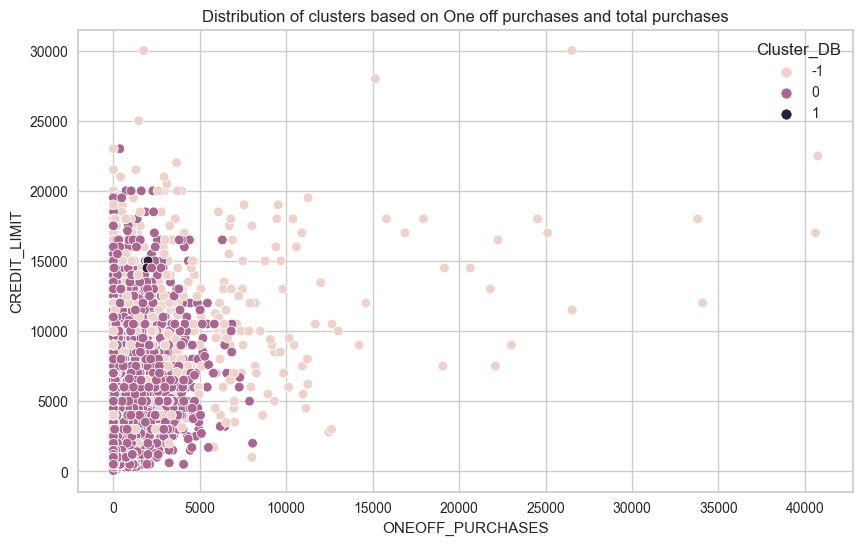

In [154]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=dfDBfin, x='ONEOFF_PURCHASES', y='CREDIT_LIMIT', hue='Cluster_DB')
plt.title('Distribution of clusters based on One off purchases and total purchases')
plt.show()

### **Hierarchical Clustering**

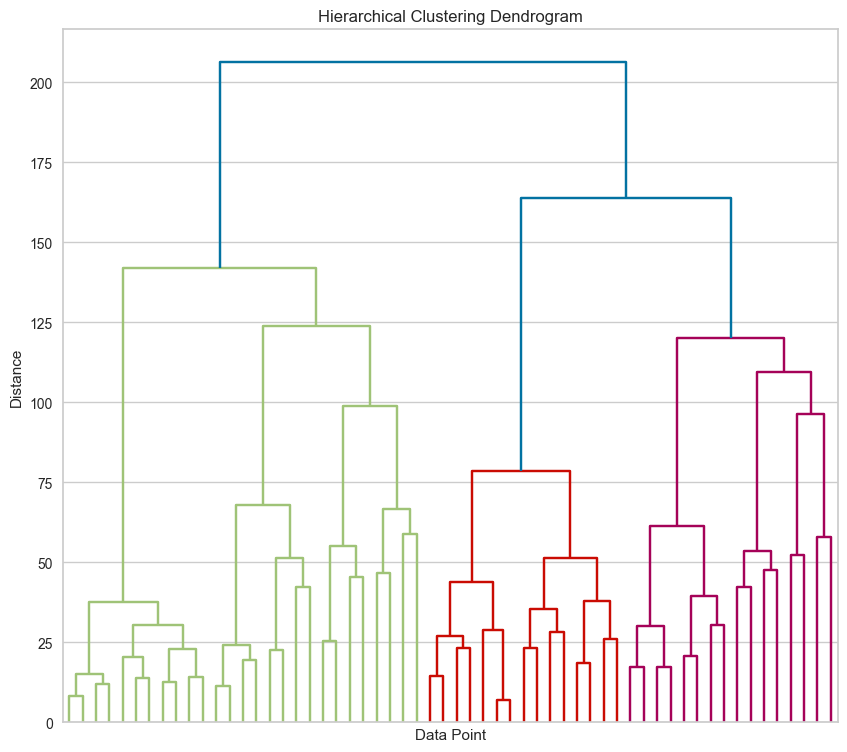

In [155]:
plt.figure(figsize=(10,9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Point')
plt.ylabel('Distance')
dendrogram(linkage_matrix, truncate_mode='level', p = 5, show_leaf_counts=False, no_labels=True)
plt.show()

dari Hierarchical Clustering dapat dilihat bahwa terdapat 4 branch utama apabila diambil garis dari distace 125

## **I. Model Evaluation**

### **K-Means**

In [156]:
dfKM = dfKMfin.groupby('Cluster_KM').mean()
dfKM

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
Cluster_KM                                                                  
0           4602.462714           0.968415   501.896219        320.373681   
1           3551.153761           0.986879  7681.620098       5095.878826   
2            894.907458           0.934734  1236.178934        593.974874   
3           1011.751528           0.789871   269.973466        209.853863   

            INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster_KM                                                              
0                       181.607404   4520.724309             0.287731   
1                      2587.208264    653.638891             0.946418   
2                       642.478274    210.570626             0.885165   
3                        60.386625    595.759339             0.170146   

            ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Cluster_KM                                                                 
0                             0.138934                          0.185516   
1                             0.739031                          0.788060   
2                             0.297070                          0.711842   
3                             0.086281                          0.080578   

            CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
Cluster_KM                                                            
0                         0.484526         14.284641       7.661102   
1                         0.071290          2.085575      89.359413   
2                         0.042573          0.790021      22.091773   
3                         0.114833          2.125503       2.903421   

            CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  \
Cluster_KM                                                                  
0            7546.957050  3481.145990       2015.160519          0.034859   
1            9696.943765  7288.739497       1975.664034          0.286707   
2            4213.207678  1332.194205        658.158925          0.269258   
3            3277.352448   974.505090        587.722303          0.078001   

               TENURE  
Cluster_KM             
0           11.387312  
1           11.951100  
2           11.594595  
3           11.446429

**Cluster 0 (Pengguna Aktif dengan Pengeluaran Sedang)**
- User memiliki saldo rata-rata atau sedang dengan pembelian secara teratur.
- Pembelian dilakukan dengan cara ONEOFF_PURCHASES dan INSTALLMENTS_PURCHASES memiliki rasio yang cukup imbang.
- Penarikan tunai dan transaksi terjadi dengan frekuensi sedang.
- CREDIT_LIMIT cukup, dan PAYMENTS konsisten.

**Cluster 1 (Pengguna yang Jarang Aktif dengan Pengeluaran Rendah)**
- User memiliki saldo lebih rendah dan melakukan pembelian yang jarang.
- ONEOFF_PURCHASES sedang ke kurang, dan INSTALLMENTS_PURCHASES jarang terjadi.
- Penarikan tunai tinggi dibandingkan dengan pembelian.
- CREDIT_LIMIT lebih rendah, dan PAYMENTS cenderung lebih rendah.

**Cluster 2 (Pengguna dengan Saldo Tinggi dan Pengeluaran Tinggi)**
- User memiliki saldo tinggi dan melakukan pembelian cukup sering.
- Pembelian dilakukan dengan cara ONEOFF_PURCHASES dan INSTALLMENTS_PURCHASES sering dilakukan.
- Penarikan tunai tinggi, menunjukkan penggunaan kartu kredit yang cukup sering.
- CREDIT_LIMIT tinggi, dan PAYMENTS signifikan.

**Cluster 3 (Pengguna yang Sangat Aktif dan Pengeluaran Tinggi)**
- User memiliki saldo yang sangat tinggi dan melakukan pembelian yang sangat sering
- Pembelian dilakukan dengan cara ONEOFF_PURCHASES dan INSTALLMENTS_PURCHASES sangat sering dilakukan.
- Penarikan tunai signifikan, menunjukkan tingkat penggunaan kartu kredit yang tinggi.
- CREDIT_LIMIT sangat tinggi, dan PAYMENTS substansial.

In [157]:
dfKMnum = dfKMfin.copy()
dfKMfin['Cluster_KM'] = dfKMfin['Cluster_KM'].map({0: 'Pengguna Aktif dengan Pengeluaran Sedang',
                                         1: 'Pengguna yang Jarang Aktif dengan Pengeluaran Rendah',
                                         2: 'Pengguna dengan Saldo Tinggi dan Pengeluaran Tinggi',
                                         3: 'Pengguna yang Sangat Aktif dan Pengeluaran Tinggi'})

In [158]:
dfKMfin.head(1)

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  40.900749           0.818182       95.4               0.0   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4           0.0             0.166667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                         0.0                          0.083333   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.0                 0              2        1000.0   

     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  \
0  201.802084        139.509787               0.0      12   

                                          Cluster_KM  
0  Pengguna yang Sangat Aktif dan Pengeluaran Tinggi

### **DBSCAN**

In [159]:
dfDB = dfDBfin.groupby('Cluster_DB').mean()
dfDB

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
Cluster_DB                                                                  
-1          4287.848332           0.927695  4645.690183       3028.669517   
 0          1364.651822           0.873572   738.739223        416.441809   
 1          8264.250220           1.000000  5298.066000       1981.172000   

            INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster_DB                                                              
-1                     1618.057333   3636.281958             0.698359   
 0                      322.544823    788.391526             0.475090   
 1                     3316.894000      0.000000             1.000000   

            ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Cluster_DB                                                                 
-1                            0.450998                          0.529541   
 0                            0.184370                          0.352186   
 1                            0.566667                          1.000000   

            CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
Cluster_DB                                                            
-1                        0.306509         11.440000      51.883333   
 0                        0.122904          2.661833      11.982145   
 1                        0.000000          0.000000     106.400000   

            CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  \
Cluster_DB                                                                  
-1           9436.366667  7532.738061       3353.676404          0.201626   
 0           4134.632490  1315.022836        688.997859          0.150362   
 1          11720.000000  3625.814118       2624.177851          0.000000   

               TENURE  
Cluster_DB             
-1          11.213333  
 0          11.538886  
 1          12.000000

**Cluster -1 (Outliers)**<br>

**Cluster 0**
- BALANCE dan BALANCE_FREQUENCY sedang.
- User dengan aktivitas sedang dalam PURCHASES dan CASH_ADVANCE.
- PURCHASES_FREQUENCY sedang.

**Cluster 1**
- user dengan rata-rata BALANCE dan BALANCE_FREQUENCY yang tinggi.
- user yang sangat aktif dalam ONEOFF_PURCHASES dan INSTALLMENTS_PURCHASES.
- memiliki PURCHASES_FREQUENCY yang sangat tinggi.
- CASH_ADVANCE rendah.


### **Scoring**

Melihat score kedua model

In [160]:
DB_davies_bouldin = davies_bouldin_score(scaled, dfDBfin['Cluster_DB'])
DB_silhouette = silhouette_score(scaled, dfDBfin['Cluster_DB'])
DB_calinski_harabasz = calinski_harabasz_score(scaled, dfDBfin['Cluster_DB'])
KM_davies_bouldin = davies_bouldin_score(scaled, dfKMfin['Cluster_KM'])
KM_silhouette = silhouette_score(scaled, dfKMfin['Cluster_KM'])
KM_calinski_harabasz = calinski_harabasz_score(scaled, dfKMfin['Cluster_KM'])

print('DB')
print(f'Davies-Bouldin Index: {DB_davies_bouldin}')
print(f'Silhouette Score: {DB_silhouette}')
print(f'Calinski-Harabasz Index: {DB_calinski_harabasz}')
print('KM')
print(f'Davies-Bouldin Index: {KM_davies_bouldin}')
print(f'Silhouette Score: {KM_silhouette}')
print(f'Calinski-Harabasz Index: {KM_calinski_harabasz}')

DB
Davies-Bouldin Index: 1.974010507795252
Silhouette Score: 0.3968149081884518
Calinski-Harabasz Index: 487.3830280055196
KM
Davies-Bouldin Index: 1.5756611165323287
Silhouette Score: 0.19749317075203252
Calinski-Harabasz Index: 1597.3989595044889


In [161]:
dfSCR = pd.DataFrame({
    "Model":['KM', 'DB'],
    "Davies-Bouldin Index":[0.8005907271716559, 1.2687097159625804],
    "Silhouette Score":[0.4076613078205912, 0.8033423840631806],
    "Calinski-Harabasz Index":[5823.677807770368, 698.1682715030869]
})
dfSCR.head()

Model  Davies-Bouldin Index  Silhouette Score  Calinski-Harabasz Index
0    KM              0.800591          0.407661              5823.677808
1    DB              1.268710          0.803342               698.168272

In [163]:
ftrscr = ['Calinski-Harabasz Index','Davies-Bouldin Index', 'Silhouette Score']
fig = px.bar(dfSCR, x = 'Model', y=ftrscr)
fig.show()

dari hasil scoring dapat disimpulkan bahwa kedua model memiliki preforma yang bagus. dengan DBSCAN memiliki batasan yang baik antar clusternya ditandai dengan Davies-Bouldin Index dan Silhouette Score. Sedangkan K-Means memiliki Calinski-Harabasz Index yang lebih baik menandakan bahwa memiliki cluster yang lebih banyak dan terdefinisi lebih baik.

karena itu untuk Model Inference akan menggunakan K-Means

## **J. Model Inference**

In [164]:
dfKMnum.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster_KM  
0   201.802084        139.509787          0.000000      12           3  
1  4103.032597       1072.340217          0.222222      12           0  
2   622.066742        627.284787          0.000000      12           2  
3     0.000000       1215.951453          0.000000      12           3  
4   678.334763        244.791237          0.000000      12           3

In [165]:
X = dfKMnum.drop('Cluster_KM', axis = 1)
y = dfKMnum['Cluster_KM']

Membagi data hasil K-Means menjadi 2 bagian X dan y

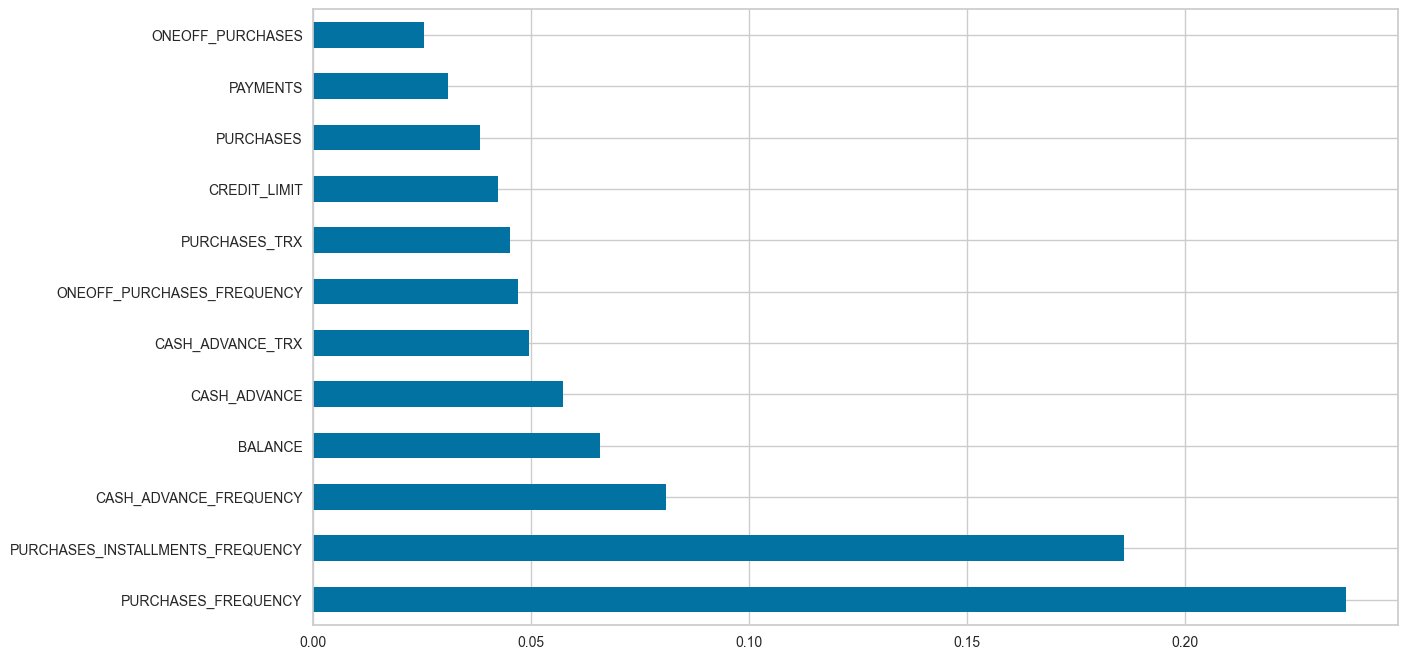

In [166]:
etc = ExtraTreesClassifier()
etc.fit(X,y)

plt.figure(figsize=(14,8))
feat_importances= pd.Series(etc.feature_importances_,index=X.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

Memilih fitur yang penting saja, disini saya memilih 6 fitur yang paling berpengaruh, harusanya saya memasukkan 8 fitur karena saya menggunakan batasan 0.050, akan tetapi saya mencoba terlalu banyak dan ada sedikit m,asalah dengan performa pc

In [167]:
drop = ['BALANCE_FREQUENCY', 
'PURCHASES', 
'ONEOFF_PURCHASES',
'INSTALLMENTS_PURCHASES', 
'ONEOFF_PURCHASES_FREQUENCY', 
'PURCHASES_TRX',
'CREDIT_LIMIT',
'PAYMENTS',
'MINIMUM_PAYMENTS', 
'PRC_FULL_PAYMENT',
'TENURE']
X = X.drop(columns=drop)

Drop fitur yang tidak dibutuhkan

In [168]:
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

Kode ini berguna untuk memperbanyak sampel dari kelas minoritas dengan menambahkan sampel acak dari yang sudah ada serta berusaha memndistribusikannya menjadi distribusi normal.

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

Kode ini berguna untuk membagi dataset menjadi train dan test, dengan train berjumlah 80% dari data dan test berjumlah 20% dari data.

In [170]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

kode ini intinya adalah memberikan label dan merubah categiorical menjadi numerik

In [171]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Kode ini berguna untuk menormalkan fitur-fitur dataset sehingga setiap fitur memiliki mean nol dan deviasi standar satu. Hal ini dilakukan dengan mengurangkan mean dari setiap fitur dan membagi hasilnya dengan deviasi standar.

In [172]:
param_distRF = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

rf_model = RandomForestClassifier(random_state=42)
rf_random = RandomizedSearchCV(rf_model, param_distributions=param_distRF, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

Hyper parameter tuning untuk RFC

In [173]:
rf_random.fit(X_train_scaled, y_train_encoded)
best_rf_model = rf_random.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


### **TRAINING**

In [174]:
def modelEva(mod, mdNM):
    y_pred = mod.predict(X_test_scaled)
    cfm = confusion_matrix(y_test_encoded, y_pred)
    
    tr_acc = mod.score(X_train_scaled, y_train_encoded)
    ts_acc = accuracy_score(y_test_encoded, y_pred)
    cv_scr = cross_val_score(mod, X_train_scaled, y_train_encoded, cv = 5, scoring='accuracy')
    cv_scrAvg =cv_scr.mean()
    
    print(f"{mdNM} Model : ")
    print("Training accuracy score : ", tr_acc)
    print("Testing accuracy score : ", ts_acc)
    print("Cross-validation scores : ", cv_scr)
    print("Average cross-validation score :", cv_scrAvg)
    print(classification_report(y_test_encoded, y_pred))
    sns.heatmap(cfm, annot=True, fmt="d", linewidths=.5, cmap = 'BuPu')
    plt.show()
    
    tr_accR = round(tr_acc*100, 2)
    ts_accR = round(ts_acc*100, 2)
    cv_scrAvgR = round(cv_scrAvg*100, 2)

    md_acc.append({
        'model' : mdNM,
        'trainig_accuracy' : tr_accR,
        'testing_accuracy' : ts_accR,
        'cv_score_avg' : cv_scrAvgR
    })
md_acc = []  

Random Forest Model : 
Training accuracy score :  0.9997642065550578
Testing accuracy score :  0.9641622131405219
Cross-validation scores :  [0.95127701 0.9611002  0.96031434 0.95086478 0.96187107]
Average cross-validation score : 0.9570854802238944
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       817
           1       0.96      1.00      0.98       805
           2       0.96      0.91      0.93       787
           3       0.96      0.95      0.95       772

    accuracy                           0.96      3181
   macro avg       0.96      0.96      0.96      3181
weighted avg       0.96      0.96      0.96      3181



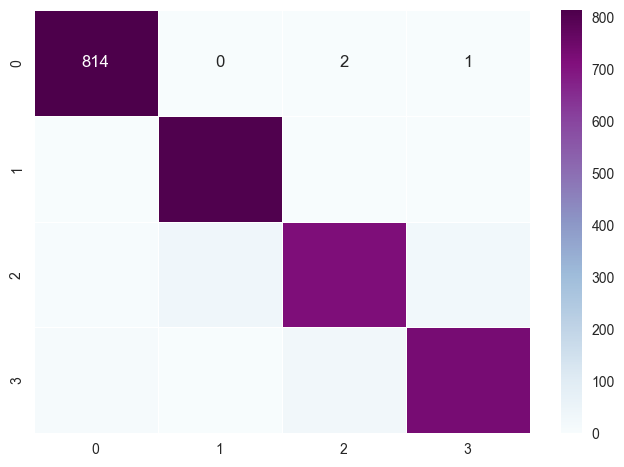

In [175]:
modelEva(best_rf_model, 'Random Forest')

Random Forest terlihat  efektif dalam menggeneralisasi, dan menunjukkan kinerja yang baik dalam mengklasifikasikan instansi ke berbagai kelas. dengan skor akurasi mendekati 1 dan Skor Cross-Validation  berkisar antara sekitar 0,9266 hingga 0,9366, dengan rata-rata skor cross-validation sebesar 0,9316 menunjukkan stabilitas dan kehandalan model di berbagai lipatan data.

In [176]:
X_inf = {'BALANCE': [213123702.467413], 
         'CASH_ADVANCE': [214776.945583], 
         'PURCHASES_FREQUENCY':[0.207000],
         'PURCHASES_INSTALLMENTS_FREQUENCY': [0.945000], 
         'CASH_ADVANCE_FREQUENCY':[0.676890000],
         'CASH_ADVANCE_TRX':[120]}
 
X_inf = pd.DataFrame(X_inf)
X_inf.head(30)

BALANCE   CASH_ADVANCE  PURCHASES_FREQUENCY  \
0  2.131237e+08  214776.945583                0.207   

   PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  
0                             0.945                 0.67689               120

Membuat data dummy

In [177]:
y_pred_inf1 = best_rf_model.predict(X_inf)
print('prediksi Random Forest: ', y_pred_inf1)

prediksi Random Forest:  [0]


Mencoba predikis dengan data dummy

## **K. Conclusion**

Dari analisis semua prose yang dilakukan diperoleh beberapa kesimpulan:
1. K-Means dan DBSCAN sama sama memiliki performa yang baik dengan bagian tersendiri, sebagai contoh DBSCAN yang hanya memiliki 2 kelompok membuat analisi kuurang detail dan lebih jatuh ke analisis secara global, akan tetapi DBSCAN lebih tahan dengan outliers, berkebalikan denga K-Means yang memiliki jumlang kelompok lebih banyak memungkinkan analisa lebih mendalam pada sertiap kelompoknya, akan tetapi cenderung lebih sensitif terhadap outliers.
2. Penggunaan Elbow Method dan Silhouette Score sangat efektif untuk menentukan jumlah cluster. Juga dengan Silhouette Score memungkinkan untuk dapat mempertimbangkan setiap jumlah cluster yang akan dipilih.
3. Epsilon cukup baik untuk menentukan cluster milik DBSCAN.
4. Hopkins Static memberikan gambaran kasar mengenai hubungan antara cluster, sehingga memudahkan untuk proses data kedepannya.
5. Hierarchical Clustering juga memiliki hasil yang cukup baik dengan kelebihan kode yang sederhana.